In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv("/content/vgsales.csv")
dataset.head()


,Rank,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,2006,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,1985,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37


In [23]:
dataset.isnull().sum()
X = dataset['Year'].values
y = dataset['Global_Sales'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [25]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [26]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [27]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,0.01,0.483660
1,0.03,0.528695
2,0.02,0.482828
3,0.02,0.528695
4,0.15,0.410240
...,...,...
825,0.26,0.469454
826,0.07,0.482828
827,5.46,0.693464
828,1.16,0.483660


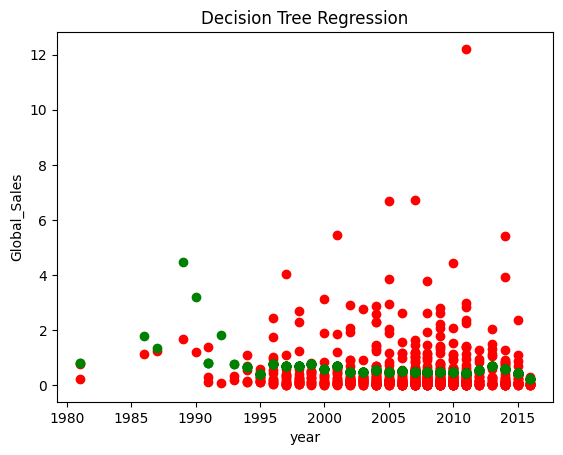

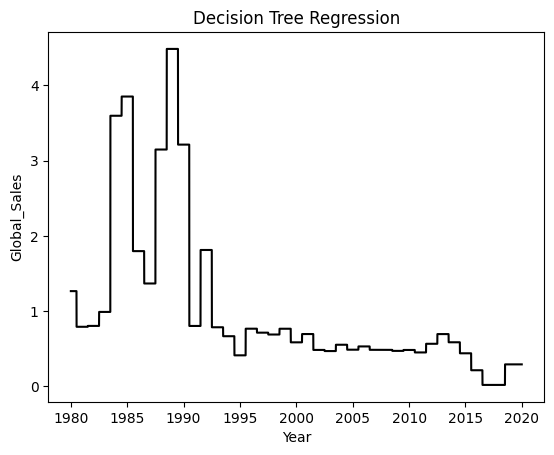

In [28]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('year')
plt.ylabel('Global_Sales')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.show()

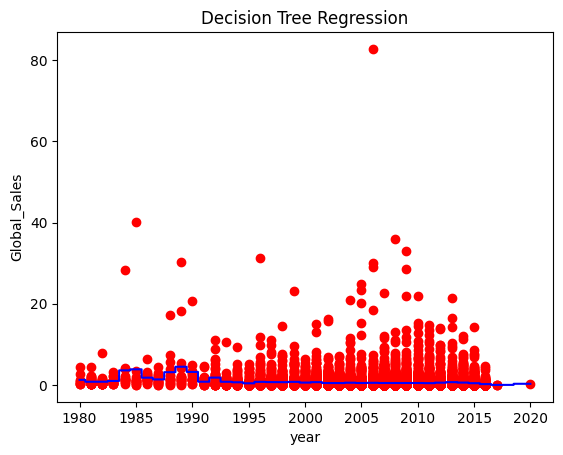

In [29]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Decision Tree Regression') 
  
# specify X axis label
plt.xlabel('year')
  
# specify Y axis label
plt.ylabel('Global_Sales')
  
# show the plot
plt.show()

In [30]:

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='decisiontree.dot',
               feature_names =['year']) 

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11618,), (4980,), (11618,), (4980,))

In [32]:
X_test=(X_test.reshape(-1,1))
X_train=(X_train.reshape(-1,1))
y_train=(y_train.reshape(-1,1))
y_test=(y_test.reshape(-1,1))
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
reg_all=DecisionTreeRegressor()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)
Rsquare=reg_all.score(X_test,y_test)
print("Rsquare: %f" %(Rsquare))
#print("Intercept: %f" %(reg_all.intercept_))
mse=mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))

Rsquare: 0.017395
mse: 2.388455
mae: 0.579972
